# Important Modules

In [1]:
import numpy as np
import sys
import matplotlib
import matplotlib.pyplot as plt
import torch
from torch import nn
import seaborn as sns
sys.path.append('gan')
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
%matplotlib inline 

# Loading Only (Y) and (flag) from (train real) and (train DG)

In [2]:
# ---------------------------------------------Loading the arrays-----------------------------------------------

# Each has three arrays: data_feature,data_attribute,data_gen_flag 
training_real = np.load('../data/google/data_train.npz')
training_generated = np.load('../data_generated/google/generated_data_train.npz')

# ---------------------------------------------Summing up flags-----------------------------------------------

flags_train = training_real['data_gen_flag']         # (50000, 2500)
flag_generated = training_generated['data_gen_flag'] # (50000, 2500)

# Sum up the ones
flags_train = np.sum(flags_train,1) -1 # mean : 10.50378
flags_generated = np.sum(flag_generated,1)-1 # mean : 9.73598


# ---------------------------------------------Converting into Labels-----------------------------------------------
real_train_Y = torch.from_numpy(training_real['data_attribute'] ).float()
real_train_Y_labels =  torch.argmax(real_train_Y,1) 

generated_train_Y = torch.from_numpy(training_generated['data_attribute']).float()
generated_train_Y_labels =  torch.argmax(generated_train_Y,1)  



In [9]:
generated_train_Y_labels[:100]

tensor([1, 2, 3, 2, 1, 2, 2, 2, 2, 0, 2, 0, 2, 2, 1, 0, 1, 2, 1, 0, 2, 1, 2, 2,
        1, 0, 2, 2, 2, 1, 1, 3, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
        2, 0, 1, 0, 1, 1, 2, 0, 1, 2, 1, 3, 3, 2, 1, 0, 0, 1, 1, 2, 2, 3, 0, 0,
        0, 3, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 0, 2, 1, 1, 2, 1, 2,
        2, 1, 1, 1])

In [3]:
# Takes (Y) as labels + Takes the flags array
def get_one_class_flag(Y,flag,class_label): 
    indices = np.where(Y==class_label)
    return  Y[indices], flag[indices]

In [4]:
# ---------------------------------------------Get One Class of each-----------------------------------------------

real_train_Y_0, flag_train_0 = get_one_class_flag(real_train_Y_labels, flags_train, class_label= 0) 
real_train_Y_1, flag_train_1 = get_one_class_flag(real_train_Y_labels, flags_train, class_label= 1) 
real_train_Y_2, flag_train_2 = get_one_class_flag(real_train_Y_labels, flags_train, class_label= 2) 
real_train_Y_3, flag_train_3 = get_one_class_flag(real_train_Y_labels, flags_train, class_label= 3) 


generated_train_Y_0, generated_train_0 = get_one_class_flag(generated_train_Y_labels, flags_generated, class_label= 0) 
generated_train_Y_1, generated_train_1 = get_one_class_flag(generated_train_Y_labels, flags_generated, class_label= 1) 
generated_train_Y_2, generated_train_2 = get_one_class_flag(generated_train_Y_labels, flags_generated, class_label= 2) 
generated_train_Y_3, generated_train_3 = get_one_class_flag(generated_train_Y_labels, flags_generated, class_label= 3) 


In [5]:
(min(flag_train_0))

0.0

# 4 Plots for Each Class + Each Plot has real and DG

Real Data Sequence Length Average 28.468218716495635
DG Data Sequence Length Average 25.575436


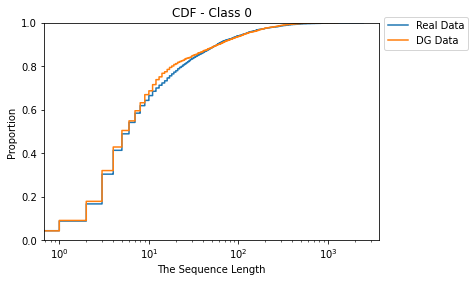

In [11]:
fig, ax = plt.subplots()
print("Real Data Sequence Length Average",np.mean(flag_train_0))
print("DG Data Sequence Length Average",np.mean(generated_train_0))

sns.ecdfplot(data=flag_train_0,legend=True,label='Real Data')
sns.ecdfplot(data=generated_train_0,legend=True,label='DG Data')
plt.xscale("log")
ax.set_title('CDF - Class 0')
ax.set_xlabel('The Sequence Length')
leg = ax.legend(bbox_to_anchor=(1, 1.05))

Real Data Sequence Length Average 4.7575513741025
DG Data Sequence Length Average 5.578832


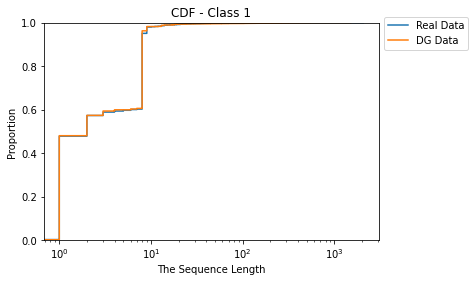

In [21]:
fig, ax = plt.subplots()

print("Real Data Sequence Length Average",np.mean(flag_train_1))
print("DG Data Sequence Length Average",np.mean(generated_train_1))

sns.ecdfplot(data=flag_train_1,legend=True,label='Real Data')
sns.ecdfplot(data=generated_train_1,legend=True,label='DG Data')
plt.xscale("log")
ax.set_title('CDF - Class 1')
ax.set_xlabel('The Sequence Length')
leg = ax.legend(bbox_to_anchor=(1, 1.05))

Real Data Sequence Length Average 7.925455912765558
DG Data Sequence Length Average 9.101303


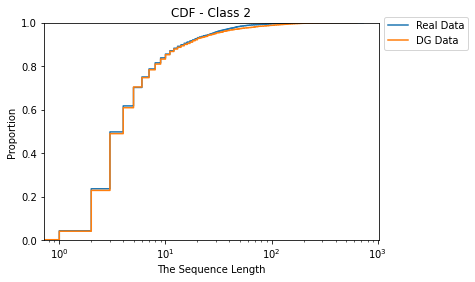

In [22]:
fig, ax = plt.subplots()

print("Real Data Sequence Length Average",np.mean(flag_train_2))
print("DG Data Sequence Length Average",np.mean(generated_train_2))

sns.ecdfplot(data=flag_train_2,legend=True,label='Real Data')
sns.ecdfplot(data=generated_train_2,legend=True,label='DG Data')
plt.xscale("log")
ax.set_title('CDF - Class 2')
ax.set_xlabel('The Sequence Length')
leg = ax.legend(bbox_to_anchor=(1, 1.05))

Real Data Sequence Length Average 15.538168570955456
DG Data Sequence Length Average 6.4906225


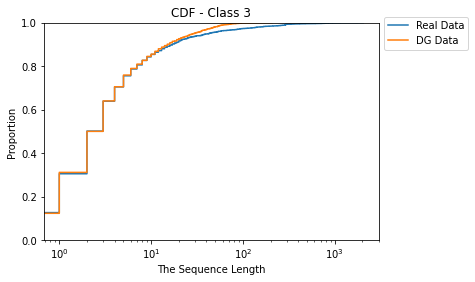

In [23]:
fig, ax = plt.subplots()
print("Real Data Sequence Length Average",np.mean(flag_train_3))
print("DG Data Sequence Length Average",np.mean(generated_train_3))

sns.ecdfplot(data=flag_train_3,legend=True,label='Real Data')
sns.ecdfplot(data=generated_train_3,legend=True,label='DG Data')
plt.xscale("log")
ax.set_title('CDF - Class 3')
ax.set_xlabel('The Sequence Length')
leg = ax.legend(bbox_to_anchor=(1, 1.05))

Real Data Sequence Length Average 10.50378
DG Data Sequence Length Average 9.73598


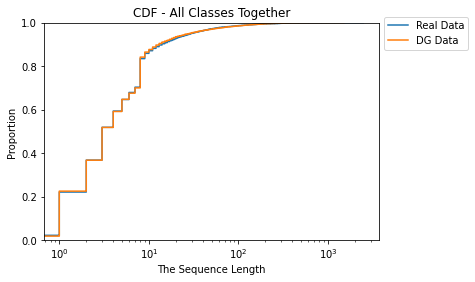

In [24]:
flag_train_concatenated = np.concatenate((flag_train_0,flag_train_1,flag_train_2,flag_train_3))
generated_train_concatenated = np.concatenate((generated_train_0,generated_train_1,generated_train_2,generated_train_3))

fig, ax = plt.subplots()
print("Real Data Sequence Length Average",np.mean(flag_train_concatenated))
print("DG Data Sequence Length Average",np.mean(generated_train_concatenated))

sns.ecdfplot(data=flag_train_concatenated,legend=True,label='Real Data')
sns.ecdfplot(data=generated_train_concatenated,legend=True,label='DG Data')
plt.xscale("log")
ax.set_title('CDF - All Classes Together')
ax.set_xlabel('The Sequence Length')
leg = ax.legend(bbox_to_anchor=(1, 1.05))